# Explore here

In [109]:
# Your code here

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV





In [45]:
ds = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep= ";")
pd.set_option('display.precision', 2)
pd.set_option('display.max_columns', None)

ds.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no



Variables Numéricas -> age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed


Varibles categóricas -> job, marital, education, housing , default, loan, contact, month, day_of_week, poutcome, 



age. Edad del cliente (numérico)

job. Tipo de trabajo (categórico)

marital. Estado civil (categórico)

education. Nivel de educación (categórico)

default. ¿Tiene crédito actualmente? (categórico)

housing. ¿Tiene un préstamo de vivienda? (categórico)

loan. ¿Tiene un préstamo personal? (categórico)

contact. Tipo de comunicación de contacto (categórico)

month. Último mes en el que se le ha contactado (categórico)

day_of_week. Último día en el que se le ha contactado (categórico)

duration. Duración del contacto previo en segundos (numérico)

campaign. Número de contactos realizados durante esta campaña al cliente (numérico)

pdays. Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico)

previous. Número de contactos realizados durante la campaña anterior al cliente (numérico)

poutcome. Resultado de la campaña de marketing anterior (categórico)

emp.var.rate. Tasa de variación del empleo. Indicador trimestral (numérico)

cons.price.idx. Índice de precios al consumidor. Indicador mensual (numérico)

cons.conf.idx. Índice de confianza del consumidor. Indicador mensual (numérico)

euribor3m. Tasa EURIBOR 3 meses. Indicador diario (numérico)

nr.employed. Número de empleados. Indicador trimestral (numérico)

y. TARGET. El cliente contrata un depósito a largo plazo o no.

In [46]:

ds.shape

(41188, 21)

In [47]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [48]:
ds.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [49]:
ds.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [50]:
ds.duplicated().sum()

12

In [51]:
if ds.duplicated().sum():
    total_data = ds.drop_duplicates()
print(total_data.shape)
total_data.head()

(41176, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no


Análisis univariante de las Variables Categóricas

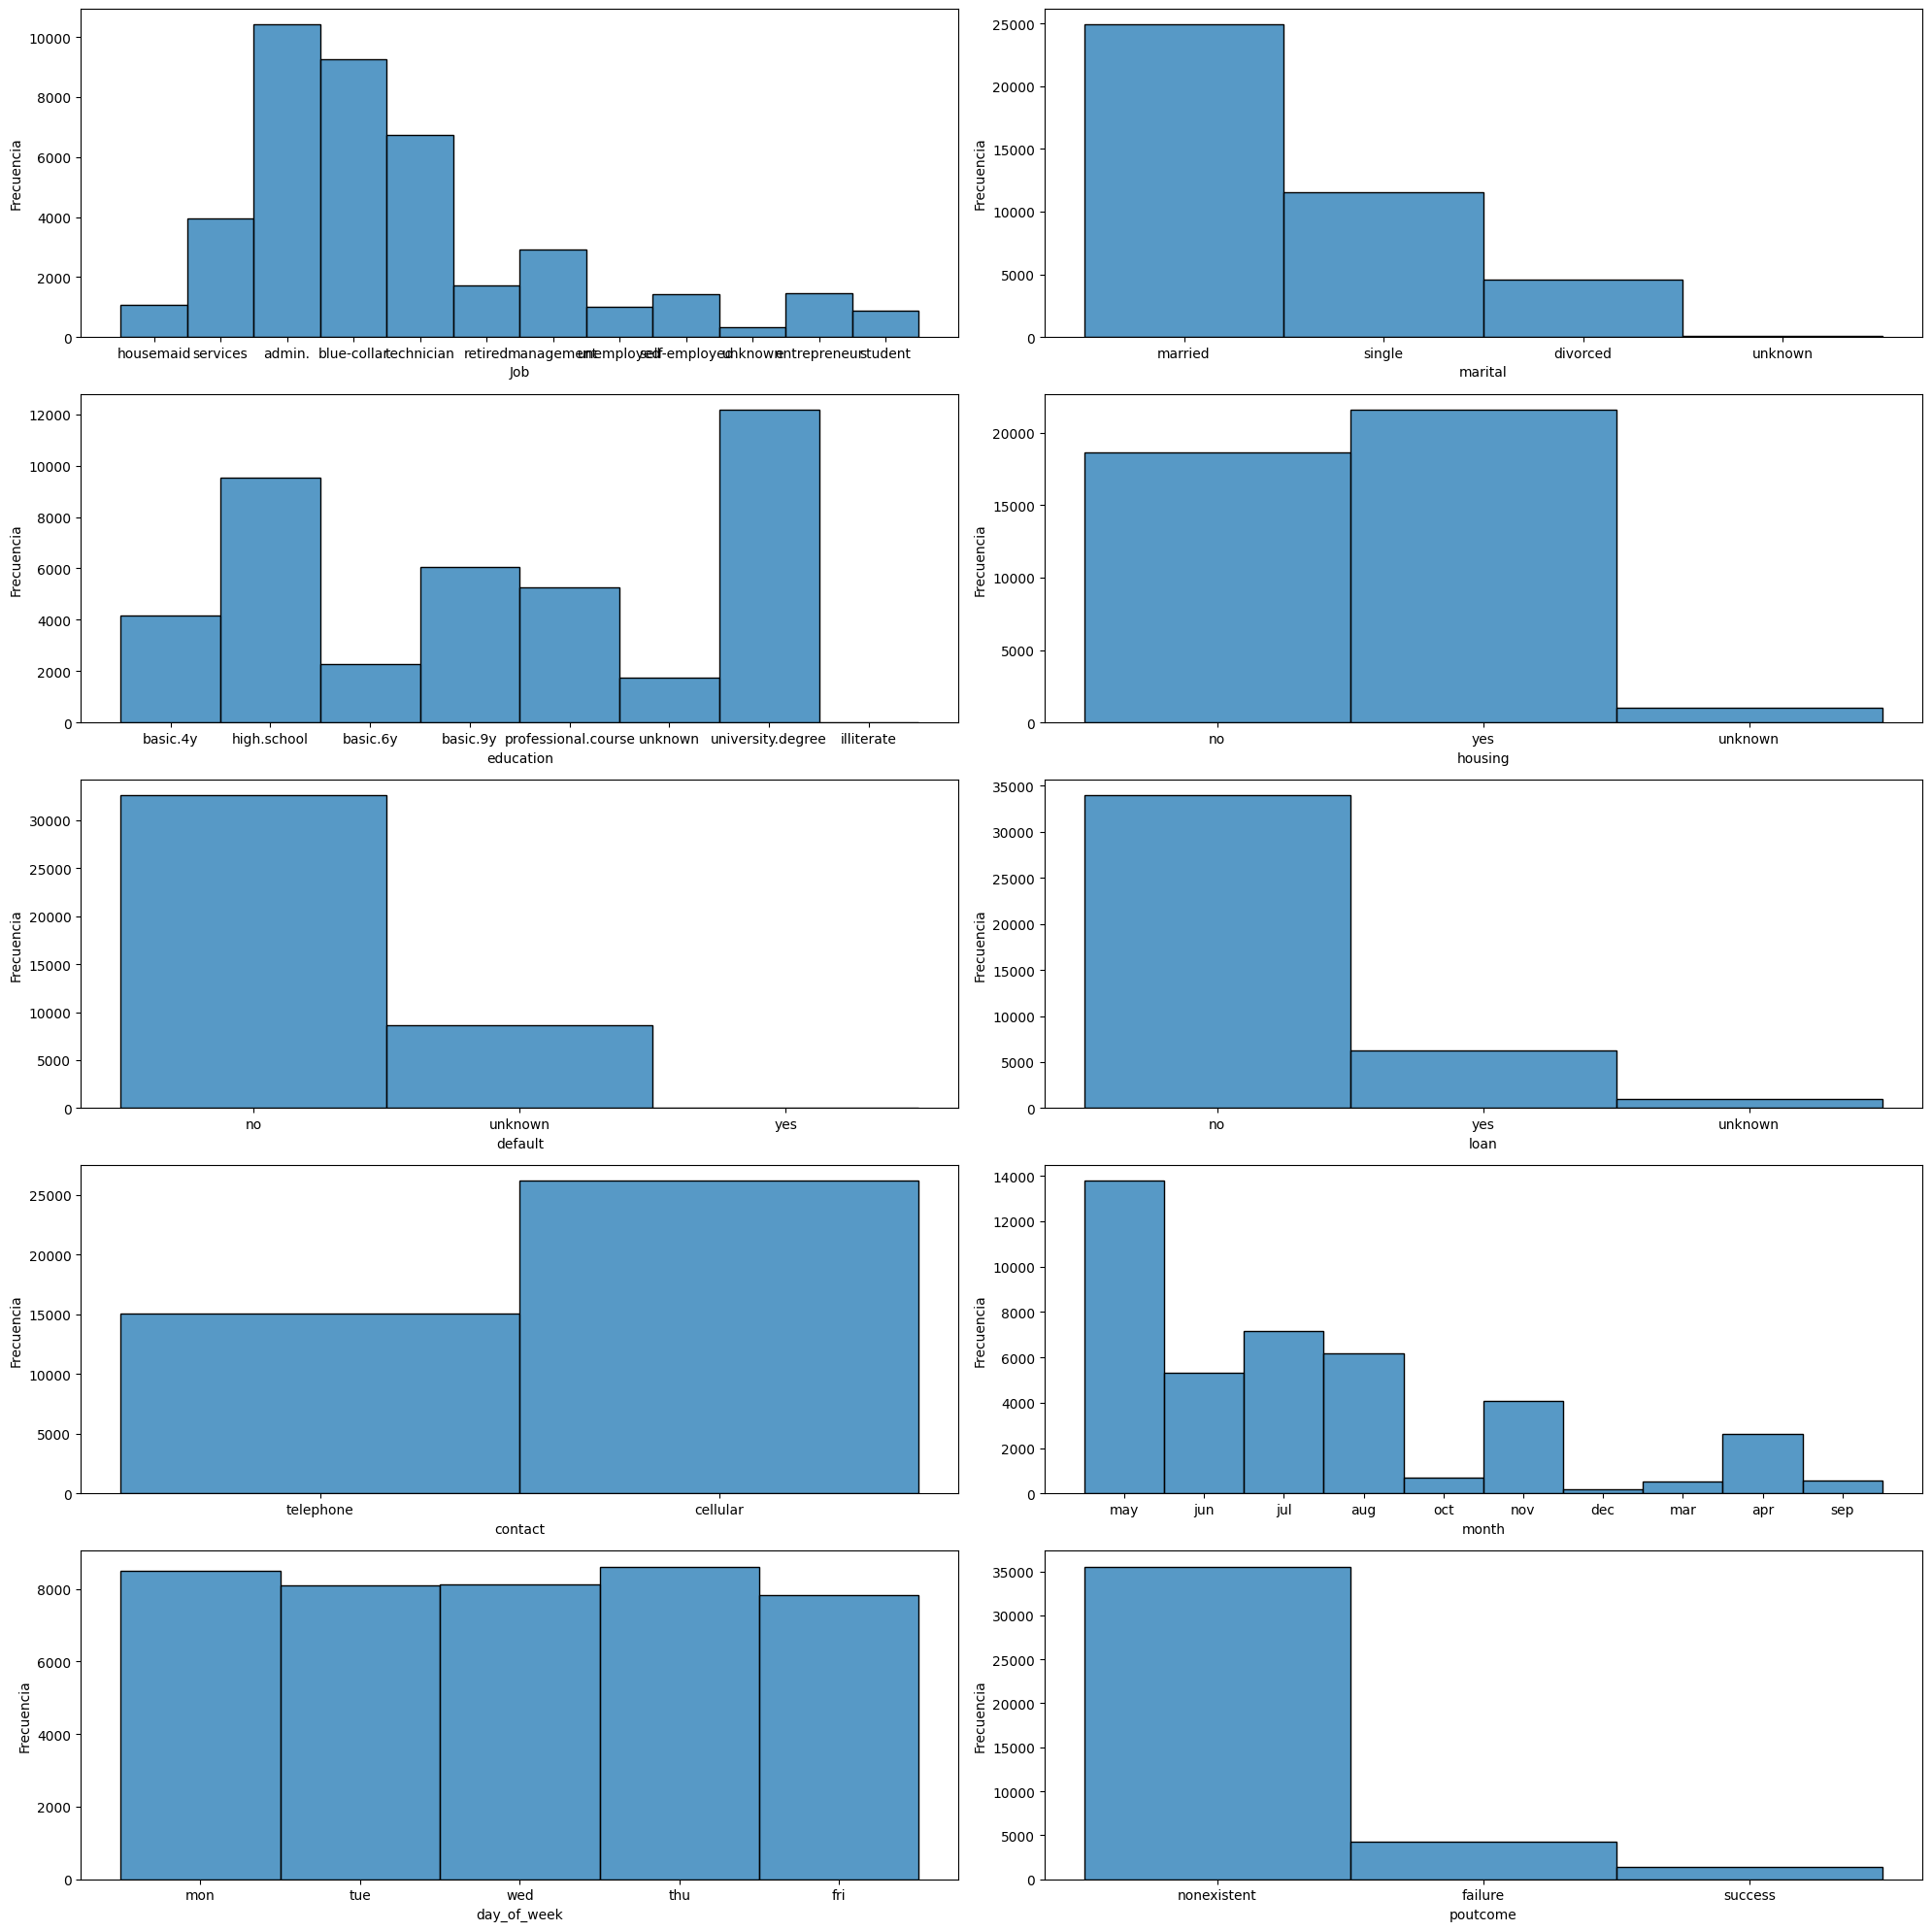

In [52]:
fig, axis = plt.subplots(5,2, figsize=(20,20))

sns.histplot(ax= axis[0,0], x= ds.job)
axis[0,0].set_xlabel('Job')
axis[0,0].set_ylabel('Frecuencia')

sns.histplot(ax= axis[0,1], x= ds.marital)
axis[0,1].set_xlabel('marital')
axis[0,1].set_ylabel('Frecuencia')

sns.histplot(ax= axis[1,0], x= ds.education)
axis[1,0].set_xlabel('education')
axis[1,0].set_ylabel('Frecuencia')

sns.histplot(ax= axis[1,1], x= ds.housing)
axis[1,1].set_xlabel('housing')
axis[1,1].set_ylabel('Frecuencia')

sns.histplot(ax= axis[2,0], x= ds.default)
axis[2,0].set_xlabel('default')
axis[2,0].set_ylabel('Frecuencia')

sns.histplot(ax= axis[2,1], x= ds.loan)
axis[2,1].set_xlabel('loan')
axis[2,1].set_ylabel('Frecuencia')

sns.histplot(ax= axis[3,0], x= ds.contact)
axis[3,0].set_xlabel('contact')
axis[3,0].set_ylabel('Frecuencia')

sns.histplot(ax= axis[3,1], x= ds.month)
axis[3,1].set_xlabel('month')
axis[3,1].set_ylabel('Frecuencia')

sns.histplot(ax= axis[4,0], x= ds.day_of_week)
axis[4,0].set_xlabel('day_of_week')
axis[4,0].set_ylabel('Frecuencia')

sns.histplot(ax= axis[4,1], x= ds.poutcome)
axis[4,1].set_xlabel('poutcome')
axis[4,1].set_ylabel('Frecuencia')




plt.tight_layout()
plt.show()




Conclusiones: 

Análisis Multivariante: Var. Categóricas - Objetivo

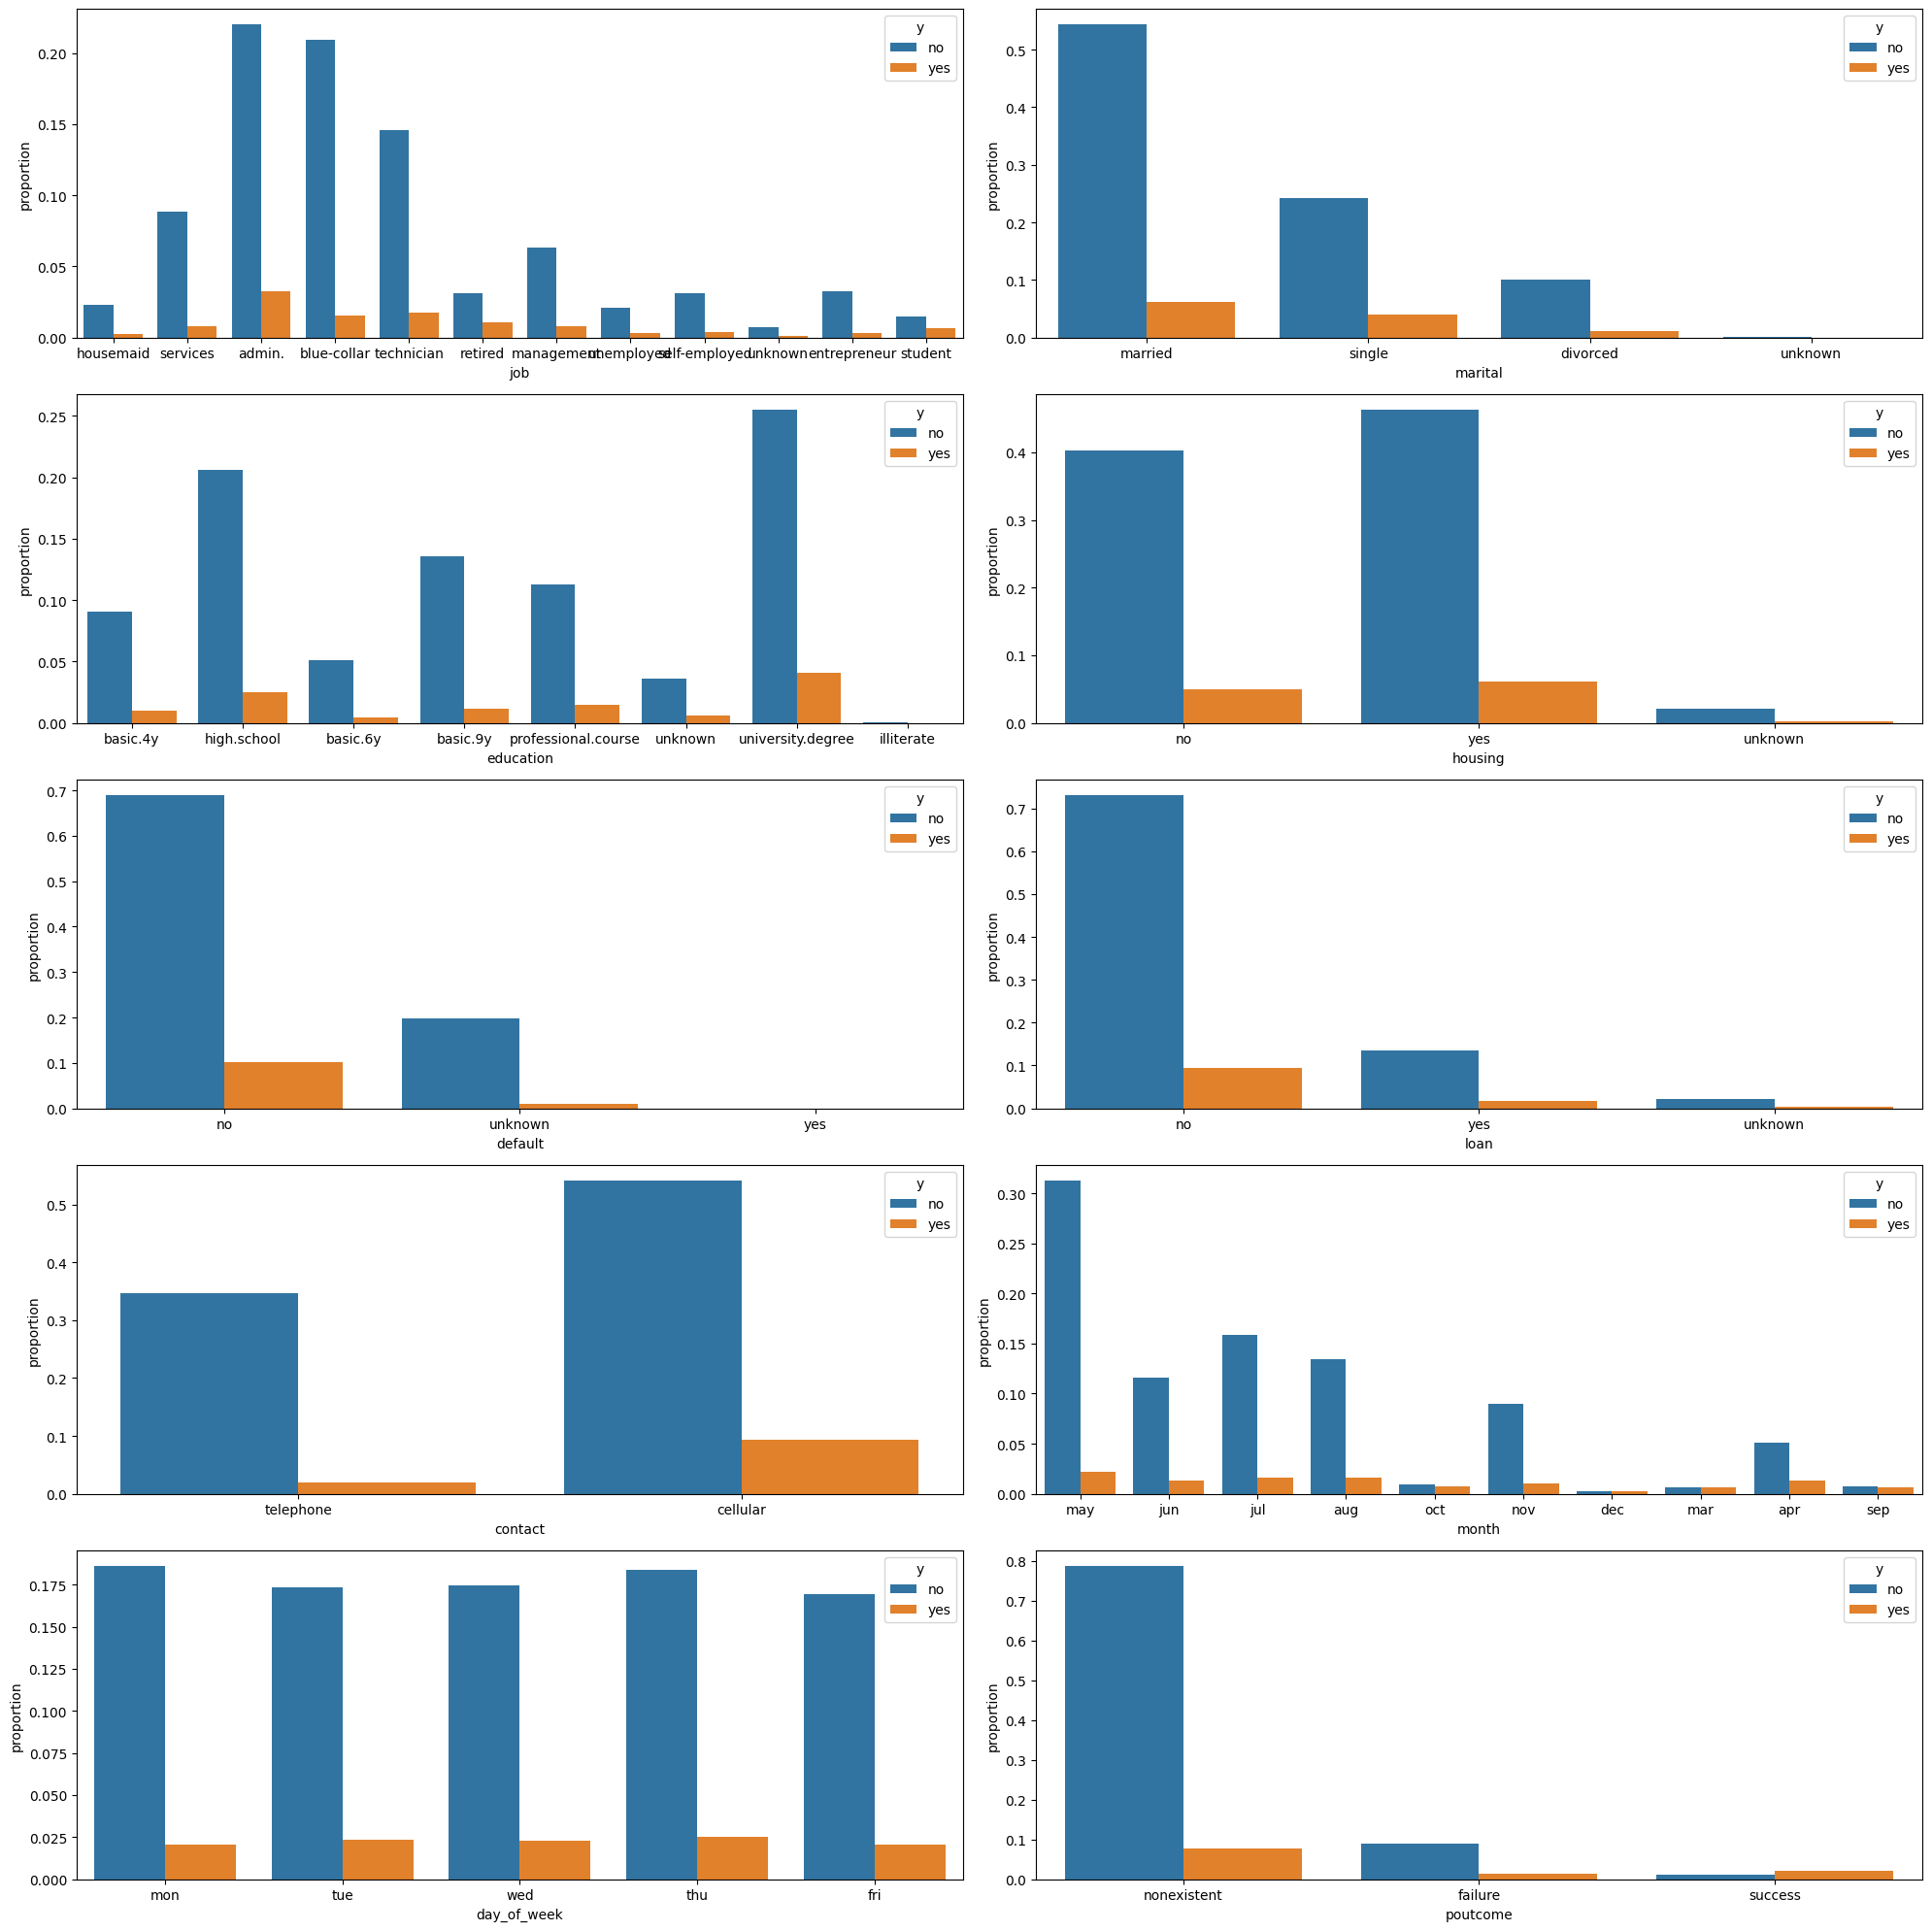

In [53]:
fig, axis = plt.subplots(5,2, figsize=(20,20))


#job, marital, education, housing , default, loan, contact, month, day_of_week, poutcome

sns.countplot(ax = axis[0, 0], data = ds, x = "job", hue = "y",stat="proportion")
sns.countplot(ax = axis[0, 1], data = ds, x = "marital", hue = "y",stat="proportion")
sns.countplot(ax = axis[1, 0], data = ds, x = "education", hue = "y",stat="proportion")
sns.countplot(ax = axis[1, 1], data = ds, x = "housing", hue = "y",stat="proportion")
sns.countplot(ax = axis[2, 0], data = ds, x = "default", hue = "y",stat="proportion")
sns.countplot(ax = axis[2, 1], data = ds, x = "loan", hue = "y",stat="proportion")
sns.countplot(ax = axis[3, 0], data = ds, x = "contact", hue = "y",stat="proportion")
sns.countplot(ax = axis[3, 1], data = ds, x = "month", hue = "y",stat="proportion")
sns.countplot(ax = axis[4, 0], data = ds, x = "day_of_week", hue = "y",stat="proportion")
sns.countplot(ax = axis[4, 1], data = ds, x = "poutcome", hue = "y",stat="proportion")

plt.tight_layout()
plt.show()

Conclusiones:

Análisis Multivariable: var. Numéricas - Objetivo

A simple vista puedo ver que la relación en "job" de la característica student es bastante más equilibrada entre el Y= si y el Y=no, que para el resto de los atributos de la variable. 

Llama la atención la distribución uniforme en la relacion entre Y= si y el Y=no en "day_of_week", lo que podría sugerir que es una variable poco o nada influyente en el resultado.

En la variable "outcome", que apunta al resultado de la campaña anterior, podemos ver que para aquellos casos en los uqe había sido exitosa suma más resultados de éxito que de fraaso.


In [54]:
ds.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


In [55]:
# Uso Factorize para transformar la variable a categórica numérica.

# Variables Numéricas -> age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed

pd.set_option('mode.chained_assignment', None)


ds["y_n"] = pd.factorize(ds["y"])[0]

y_n_codes = ds["y_n"]
y_labels = ds.y


y_a_categoria = dict(zip(y_n_codes, y_labels))
y_a_categoria


{0: 'no', 1: 'yes'}

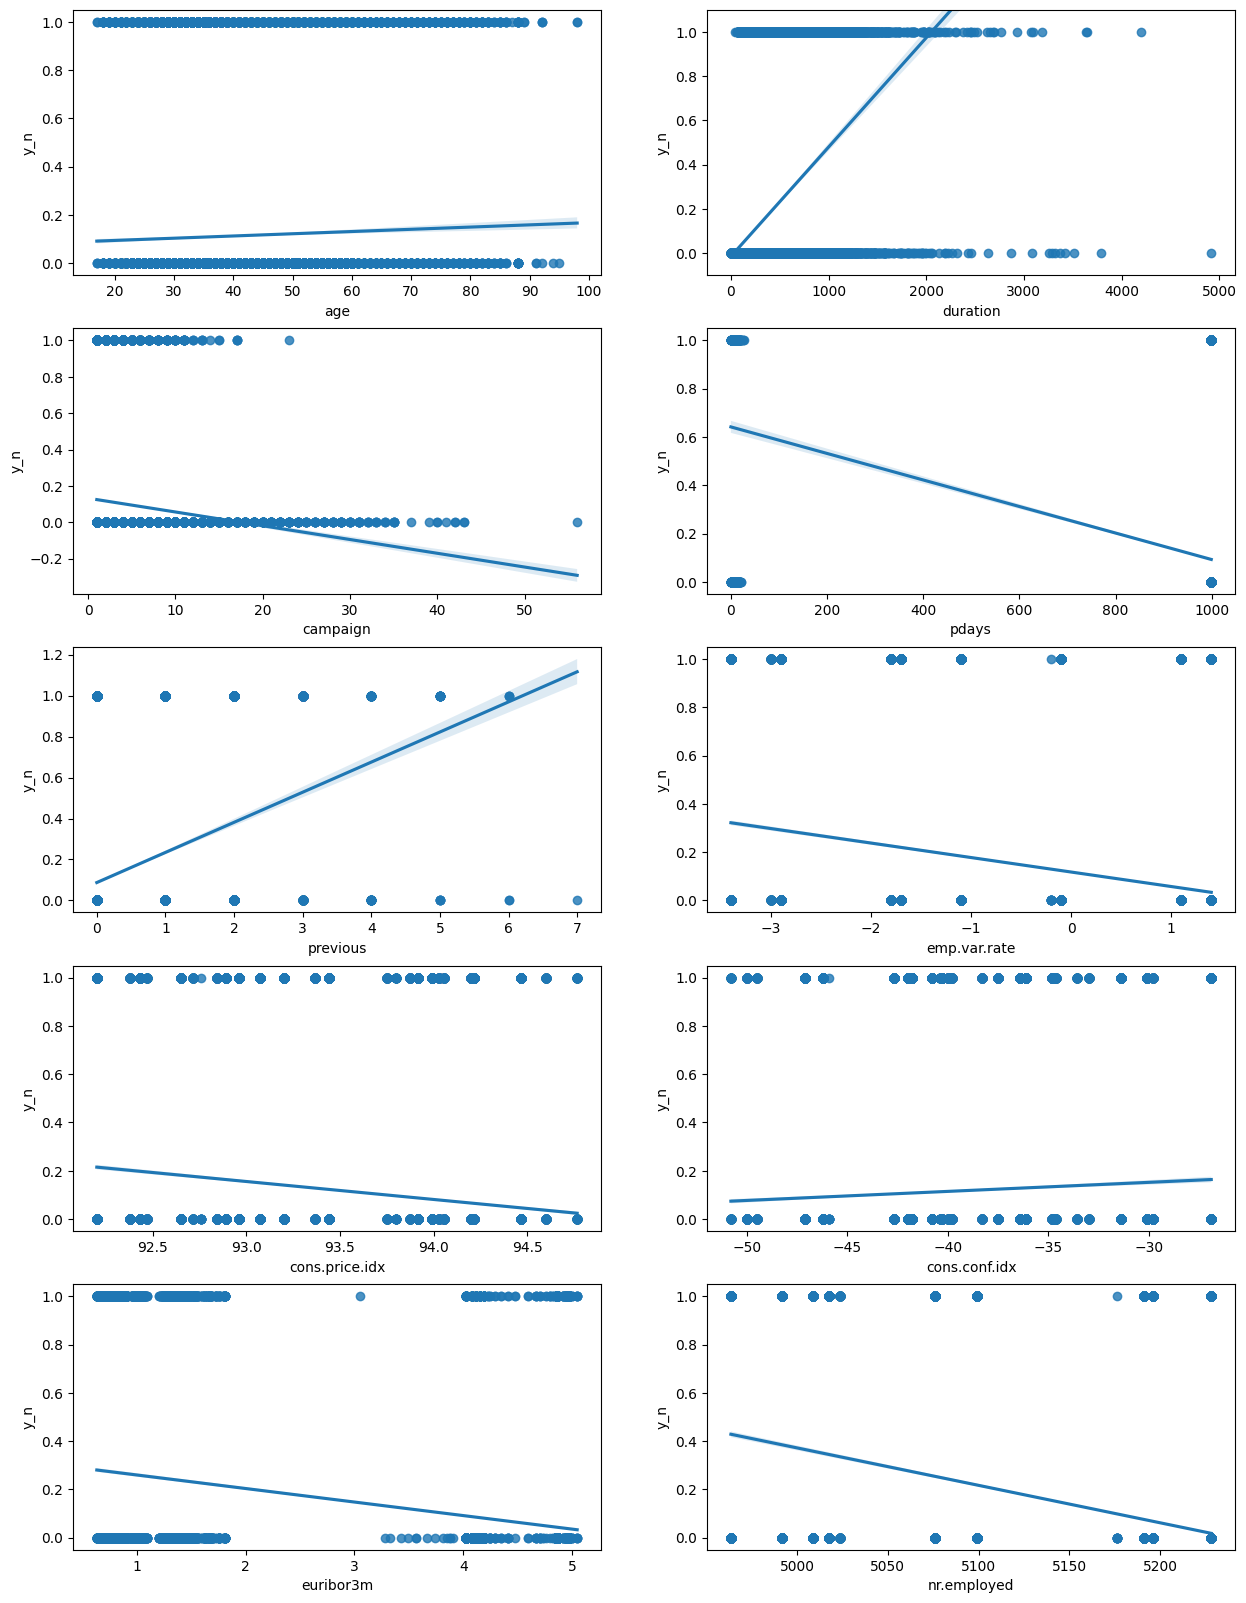

In [56]:
fig, axis = plt.subplots(5, 2, figsize=(15, 20))

sns.regplot(ax= axis[0,0], data=ds, x="age", y="y_n")
sns.regplot(ax= axis[0,1], data=ds, x="duration", y="y_n")
sns.regplot(ax= axis[1,0], data=ds, x="campaign", y="y_n")
sns.regplot(ax= axis[1,1], data=ds, x="pdays", y="y_n")
sns.regplot(ax= axis[2,0], data=ds, x="previous", y="y_n")
sns.regplot(ax= axis[2,1], data=ds, x="emp.var.rate", y="y_n")
sns.regplot(ax= axis[3,0], data=ds, x="cons.price.idx", y="y_n")
sns.regplot(ax= axis[3,1], data=ds, x="cons.conf.idx", y="y_n")
sns.regplot(ax= axis[4,0], data=ds, x="euribor3m", y="y_n")
sns.regplot(ax= axis[4,1], data=ds, x="nr.employed", y="y_n")

axis[0, 1].set_ylim(-0.1, 1.1)

plt.tight_layout
plt.show()

Conclusiones (observar tendencias)

En la relación entre las variables numéricas y el objetivo, podemos notar que alguna tendencia significativa:

"duration" -> Duración de la llamada-> Muestra una marcada tendencia positiva. A mayor duración de la llamada, más se tiende a que sea un cliente el cual contrata un depósito.

"previous" -> Número de contactos realizados durante la campaña anterior al cliente (numérico) -> Marca una tendencia positiva. Antes más llamadas que se hayan hecho en la campaña anterrior, más tiende a ser un cliente que contrata un depósito a largo plazo.

"pdays" -> Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico) -> Marca una tendencia negativa. Mientras menos días hayan transcurrido desde la última campaña gasta el nuevo contacto, más tiende a ser un cliente que compre. 



In [57]:
ds["y_n"].shape

(41188,)

La regresión logística funciona cn variables numéricas, motivo por el cual debemos asignar un valor numérico a las variables categóricas.

In [58]:
var_categoricas = ["job", "marital", "education", "default", "housing", "loan", "month", "day_of_week",  "poutcome"]

ds[var_categoricas].nunique()

job            12
marital         4
education       8
default         3
housing         3
loan            3
month          10
day_of_week     5
poutcome        3
dtype: int64

In [59]:



ds["job_n"] = pd.factorize(ds["job"])[0]
ds["marital_n"] = pd.factorize(ds["marital"])[0]
ds["education_n"] = pd.factorize(ds["education"])[0]
ds["default_n"] = pd.factorize(ds["default"])[0]
ds["housing_n"] = pd.factorize(ds["housing"])[0]
ds["loan_n"] = pd.factorize(ds["loan"])[0]
ds["contact_n"] = pd.factorize(ds["contact"])[0]
ds["month_n"] = pd.factorize(ds["month"])[0]
ds["day_of_week_n"] = pd.factorize(ds["day_of_week"])[0]
ds["poutcome_n"] = pd.factorize(ds["poutcome"])[0]

job_n_codes = ds["job_n"]
job_labels = ds.job

martial_n_codes = ds["marital_n"]
martial_labels = ds.marital

edu_n_codes = ds["education_n"]
edu_labels = ds.education

defau_n_codes = ds["default_n"]
defau_labels = ds.default

house_n_codes = ds["housing_n"]
house_labels = ds.housing

loan_n_codes = ds["loan_n"]
loan_labels = ds.loan_n

contact_n_codes = ds["contact_n"]
contact_labels = ds.contact

motnh_n_codes = ds["month_n"]
month_labels = ds.month

week_n_codes = ds["day_of_week_n"]
week_labels = ds.day_of_week

outcome_n_codes = ds["poutcome_n"]
outcome_labels = ds.poutcome

variables_n = [(job_n_codes, job_labels), (martial_n_codes, martial_labels), 
               (edu_n_codes, edu_labels), (defau_n_codes, defau_labels), (house_n_codes, house_labels),
                 (loan_n_codes, loan_labels), (contact_n_codes, contact_labels), (motnh_n_codes, month_labels),
                 (week_n_codes, week_labels), (outcome_n_codes, outcome_labels)]

for code_var, label_var in variables_n:
    codes = code_var
    labels = label_var
    relaciones = dict(zip(codes, labels))
    print(relaciones)


{0: 'housemaid', 1: 'services', 2: 'admin.', 3: 'blue-collar', 4: 'technician', 5: 'retired', 6: 'management', 7: 'unemployed', 8: 'self-employed', 9: 'unknown', 10: 'entrepreneur', 11: 'student'}
{0: 'married', 1: 'single', 2: 'divorced', 3: 'unknown'}
{0: 'basic.4y', 1: 'high.school', 2: 'basic.6y', 3: 'basic.9y', 4: 'professional.course', 5: 'unknown', 6: 'university.degree', 7: 'illiterate'}
{0: 'no', 1: 'unknown', 2: 'yes'}
{0: 'no', 1: 'yes', 2: 'unknown'}
{0: 0, 1: 1, 2: 2}
{0: 'telephone', 1: 'cellular'}
{0: 'may', 1: 'jun', 2: 'jul', 3: 'aug', 4: 'oct', 5: 'nov', 6: 'dec', 7: 'mar', 8: 'apr', 9: 'sep'}
{0: 'mon', 1: 'tue', 2: 'wed', 3: 'thu', 4: 'fri'}
{0: 'nonexistent', 1: 'failure', 2: 'success'}


In [60]:
ds.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_n', 'job_n',
       'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n',
       'contact_n', 'month_n', 'day_of_week_n', 'poutcome_n'],
      dtype='object')

In [61]:
# Divido el DF en variables de entrenamiento y testeo con train_test_split

num_variables = ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n",
                 "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]

cat_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome', 'y']

x = ds.drop(["y_n"] + cat_variables, axis=1)
y = ds["y_n"]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [62]:
# Vamos a usar un método embebido que nos informe de la importancia de las características
# Crea un modelo XGBoost Regressor
model = xgb.XGBRegressor(objective='reg:squarederror')

# Entrena el modelo en los datos de entrenamiento
model.fit(x_train, y_train)

# Calcula la importancia de las características
feature_importances = model.feature_importances_

# Asocia las importancias con los nombres de las características
feature_names = x.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Ordena las características por importancia (de mayor a menor)
sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))

# Imprime la importancia de las características (número adimensional, las características se comparan entre sí en términos de su contribución relativa a la predicción)
for feature, importance in sorted_feature_importance.items():
    print(f'Feature: {feature}, Importance: {importance*100}')

Feature: nr.employed, Importance: 71.14594578742981
Feature: duration, Importance: 3.9843209087848663
Feature: pdays, Importance: 2.8497204184532166
Feature: cons.conf.idx, Importance: 2.837706357240677
Feature: cons.price.idx, Importance: 2.0215723663568497
Feature: default_n, Importance: 1.7943453043699265
Feature: euribor3m, Importance: 1.5789303928613663
Feature: contact_n, Importance: 1.430075615644455
Feature: day_of_week_n, Importance: 1.293029636144638
Feature: education_n, Importance: 1.192012894898653
Feature: loan_n, Importance: 1.1496703140437603
Feature: job_n, Importance: 1.0676374658942223
Feature: poutcome_n, Importance: 1.0638153180480003
Feature: housing_n, Importance: 1.007059682160616
Feature: campaign, Importance: 0.966410618275404
Feature: marital_n, Importance: 0.9601813741028309
Feature: previous, Importance: 0.9512119926512241
Feature: emp.var.rate, Importance: 0.9196119382977486
Feature: age, Importance: 0.9142832830548286
Feature: month_n, Importance: 0.87246

In [63]:
corr = ds[num_variables].corr()
corr.style.background_gradient(cmap="coolwarm").format(precision=3)

,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_n
job_n,1.000,-0.008,0.165,-0.013,0.006,-0.005,0.017,0.076,-0.002,0.049,0.030,0.010,-0.017,-0.052,0.051,-0.083,-0.046,0.023,-0.072,-0.085,0.055
marital_n,-0.008,1.000,0.064,-0.104,0.007,0.002,0.044,0.021,-0.004,0.031,-0.115,0.001,0.002,-0.018,0.030,-0.049,-0.025,-0.051,-0.055,-0.050,0.026
education_n,0.165,0.064,1.000,-0.144,0.013,0.002,0.095,0.114,0.009,0.025,-0.092,-0.015,-0.002,-0.035,0.023,-0.033,-0.080,0.072,-0.024,-0.025,0.046
default_n,-0.013,-0.104,-0.144,1.000,-0.011,0.001,-0.135,-0.136,-0.004,-0.108,0.165,-0.012,0.033,0.080,-0.102,0.203,0.168,0.027,0.195,0.190,-0.099
housing_n,0.006,0.007,0.013,-0.011,1.000,0.290,0.065,0.046,-0.007,0.021,-0.002,-0.009,-0.010,-0.009,0.021,-0.053,-0.066,-0.028,-0.053,-0.042,0.010
loan_n,-0.005,0.002,0.002,0.001,0.290,1.000,-0.004,-0.009,0.003,-0.001,-0.006,-0.003,0.004,0.001,0.001,0.003,0.006,-0.006,0.002,0.002,-0.005
contact_n,0.017,0.044,0.095,-0.135,0.065,-0.004,1.000,0.430,-0.020,0.227,-0.007,0.027,-0.077,-0.118,0.213,-0.394,-0.591,-0.252,-0.400,-0.269,0.145
month_n,0.076,0.021,0.114,-0.136,0.046,-0.009,0.430,1.000,0.012,0.185,0.083,0.018,-0.081,-0.135,0.176,-0.306,-0.331,-0.061,-0.276,-0.262,0.183
day_of_week_n,-0.002,-0.004,0.009,-0.004,-0.007,0.003,-0.020,0.012,1.000,0.003,-0.018,0.011,0.015,0.007,0.004,-0.004,-0.005,-0.000,-0.006,-0.001,0.010
poutcome_n,0.049,0.031,0.025,-0.108,0.021,-0.001,0.227,0.185,0.003,1.000,0.026,0.026,-0.086,-0.745,0.869,-0.457,-0.260,-0.042,-0.479,-0.510,0.270


In [64]:
cor_best = corr[corr.y_n > 0.15].index
cor_best



Index(['month_n', 'poutcome_n', 'duration', 'previous', 'y_n'], dtype='object')

In [65]:
def get_vars_to_delete(d_imp, corr, imp_cut = 0.1, corr_cut = 0.15):
  ls_vars_low_corr = corr[corr.y_n.abs()<=corr_cut].index
  return [var for var in ls_vars_low_corr if d_imp[var]<=imp_cut]


In [66]:
vars_to_drop = get_vars_to_delete(sorted_feature_importance, corr,imp_cut=0.1, corr_cut=0.15)
vars_to_drop

['job_n',
 'marital_n',
 'education_n',
 'default_n',
 'housing_n',
 'loan_n',
 'contact_n',
 'day_of_week_n',
 'age',
 'campaign',
 'cons.price.idx',
 'cons.conf.idx']

In [77]:
x_train.drop(vars_to_drop, axis = 1)
x_test.drop(vars_to_drop, axis = 1)

,duration,pdays,previous,emp.var.rate,euribor3m,nr.employed,month_n,poutcome_n
15500,635,999,0,1.4,4.96,5228.1,2,0
29034,248,999,0,-1.8,1.41,5099.1,8,0
11199,207,999,0,1.4,4.96,5228.1,1,0
22247,176,999,0,1.4,4.96,5228.1,3,0
27180,271,999,0,-0.1,4.02,5195.8,5,0
...,...,...,...,...,...,...,...,...
33745,167,999,0,-1.8,1.28,5099.1,0,0
8263,25,999,0,1.4,4.86,5228.1,1,0
24069,15,999,0,-0.1,4.70,5195.8,5,0
15531,252,999,0,1.4,4.96,5228.1,2,0


In [74]:
scaler= MinMaxScaler()
var_scal = scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)

print(f"X TRAIN -->  Mínimo: {x_train_sc.min()} - Máximo: {x_test_sc.max()}")

print(f"X TEST -->   Mínimo: {x_test_sc.min()} - Máximo: {x_test_sc.max()}")

X TRAIN -->  Mínimo: 0.0 - Máximo: 1.0
X TEST -->   Mínimo: 0.0 - Máximo: 1.0


In [76]:
len(x_train_sc)

30891

Ya estamos en condiciones de modelizar los datos. 

Se utilizará Logistic Regressiion de sklearn para predecir la clasificación de Y. 

In [80]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train_sc, y_train)

LogisticRegression(max_iter=1000)

In [81]:
y_pred = model.predict(x_test_sc)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [83]:
accuracy_score(y_test, y_pred)

0.9103622414295426

El resultado de la predicción tras la Regresión Logística, arroja un acierto del 91% de los casos del conjunto de test. 

Procedemos a presentar los resultados en una matriz de confusión.

In [87]:
matriz_conf = confusion_matrix(y_test, y_pred)
matriz_conf

array([[8932,  207],
       [ 716,  442]])

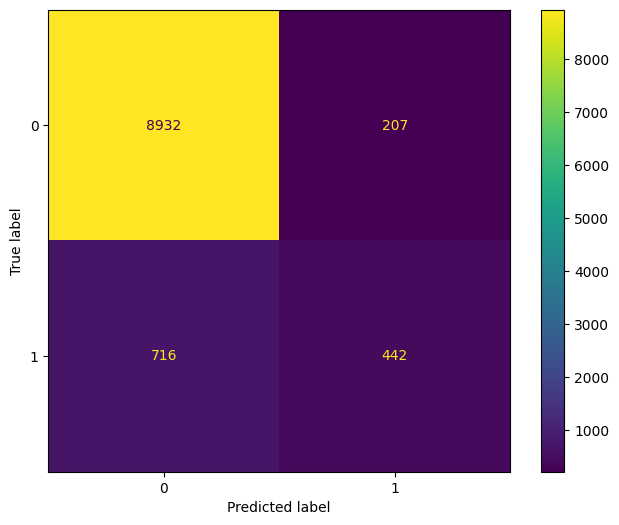

In [92]:
matriz_confux = ConfusionMatrixDisplay(matriz_conf)
fig, ax = plt.subplots(figsize=(8, 6))
matriz_confux.plot(ax=ax)  
plt.show()

In [93]:
# Valores de la matriz de confusión
TP = 442
TN = 8932
FP = 207
FN = 716

# efectividad
efectividad = (TP + TN) / (TP + TN + FP + FN)

print("Efectividad del modelo:", efectividad)


Efectividad del modelo: 0.9103622414295426


Búsqueda de Hiperparámetros

In [101]:
#Diccionarios de HP

hp = {'penalty': ['l1', 'l2', 'elasticnet', None],
      'dual': [True, False],
      'tol' : np.logspace(-4, -1, 30),
      'C': np.logspace(-4, 4, 20),
      'fit_intercept': [True, False],
      'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
      'warm_start': [True, False]
      }

Búsqueda con RandomizedSearchCV

In [105]:
random_search = RandomizedSearchCV(estimator= model, param_distributions=hp, n_iter=100, cv=5, random_state=10, n_jobs=1, scoring='roc_auc', verbose=1)
random_search.fit(x_train_sc, y_train)

# Ignorar las advertencias de convergencia de sklearn
warnings.filterwarnings('ignore', category=ConvergenceWarning)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/vscode/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear fail

In [106]:
random_search.best_params_

{'warm_start': True,
 'tol': 0.018873918221350976,
 'solver': 'newton-cholesky',
 'penalty': None,
 'fit_intercept': True,
 'dual': False,
 'C': 0.03359818286283781}

In [107]:
opt_model =LogisticRegression(warm_start= True, tol= 0.018873918221350976,max_iter=10000, 
                              solver='newton-cholesky', penalty= None, fit_intercept=True,
                              dual= False, C=0.03359818286283781)

model.fit(x_train_sc, y_train)

LogisticRegression(max_iter=1000)

In [108]:
accuracy_score(y_test, y_pred)

0.9103622414295426

No se producen mejorías tras aplicar los HP devueltos por RandomizedSearch, lo que sugiere que el modelo llegó a un máximo local.


Haremos una nueva búsqeuda de HP, pero ahora con GridSearchCV:

In [111]:
grid = GridSearchCV(model, hp, scoring = "accuracy", cv = 5, n_jobs=-1, verbose=1)


def warn(*args, **kwargs):
    pass

warnings.warn = warn

grid.fit(x_train, y_train)

grid.best_params_

Fitting 5 folds for each of 115200 candidates, totalling 576000 fits


/home/vscode/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear fail